# Lab 8: Define and Solve an ML Problem of Your Choosing

In [17]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [18]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename)

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

#### Dataset Chosen
I have chosen the World Happiness Report (WHR) data set, specifically focusing on the columns that measure political stability, economic indicators, and overall well-being metrics.

#### Prediction Objective
The objective of this ML problem is to predict the economic growth of countries, represented by the Log GDP per capita. This involves understanding how political stability and various socio-economic factors influence economic growth.

#### Supervised or Unsupervised Learning
This is a supervised learning problem. We have labeled data in the form of historical records that include both the features (predictors) and the target variable (Log GDP per capita).

#### Type of Problem
This is a regression problem because the label we aim to predict, Log GDP per capita, is a continuous numerical value. 

#### Features
The features used in this prediction model include:
- **Confidence in National Government**: Reflects public trust in the government.
- **Perceptions of Corruption**: Indicates the public's view on the level of corruption.
- **Democratic Quality**: Measures the quality of democratic governance.
- **Social Support**: Reflects the social support networks available.
- **Healthy Life Expectancy at Birth**: Indicates the expected lifespan based on health conditions.
- **Freedom to Make Life Choices**: Measures the perceived freedom in making life decisions.
- **Generosity**: Reflects the level of generosity in the society.
- **Positive Affect**: Indicates the presence of positive emotions.
- **Negative Affect**: Indicates the presence of negative emotions.
- **Life Ladder** (optional): Overall happiness score, providing context to the socio-economic environment.

This list of features may be refined after further exploration and analysis of the dataset.

#### Importance of the Problem
Predicting the impact of political stability on economic growth is crucial for both businesses and policymakers. For companies, understanding these dynamics can guide strategic decisions such as market entry, investment, and resource allocation. Businesses can optimize operations, supply chain management, and marketing strategies based on the economic outlook of different regions, thereby enhancing profitability and reducing risks. 

For instance, a company considering expanding into new international markets can use these predictions to identify countries with stable political environments and high potential for economic growth. This allows for better risk management and maximizes the return on investment. Similarly, investors can make more informed decisions about where to allocate capital, favoring regions with positive economic forecasts driven by political stability.

Overall, a model that predicts economic growth based on political stability and socio-economic factors provides valuable insights, enabling companies to proactively respond to changing conditions, capitalize on growth opportunities, and maintain a competitive edge in the global market.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

       country  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.168690        0.450662   
1  Afghanistan  2009     4.401778            7.333790        0.552308   
2  Afghanistan  2010     4.758381            7.386629        0.539075   
3  Afghanistan  2011     3.831719            7.415019        0.521104   
4  Afghanistan  2012     3.782938            7.517126        0.520637   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         49.209663                      0.718114    0.181819   
1                         49.624432                      0.678896    0.203614   
2                         50.008961                      0.600127    0.137630   
3                         50.367298                      0.495901    0.175329   
4                         50.709263                      0.530935    0.247159   

   Perceptions of corruption  Positive affect  Negative affect  \
0       

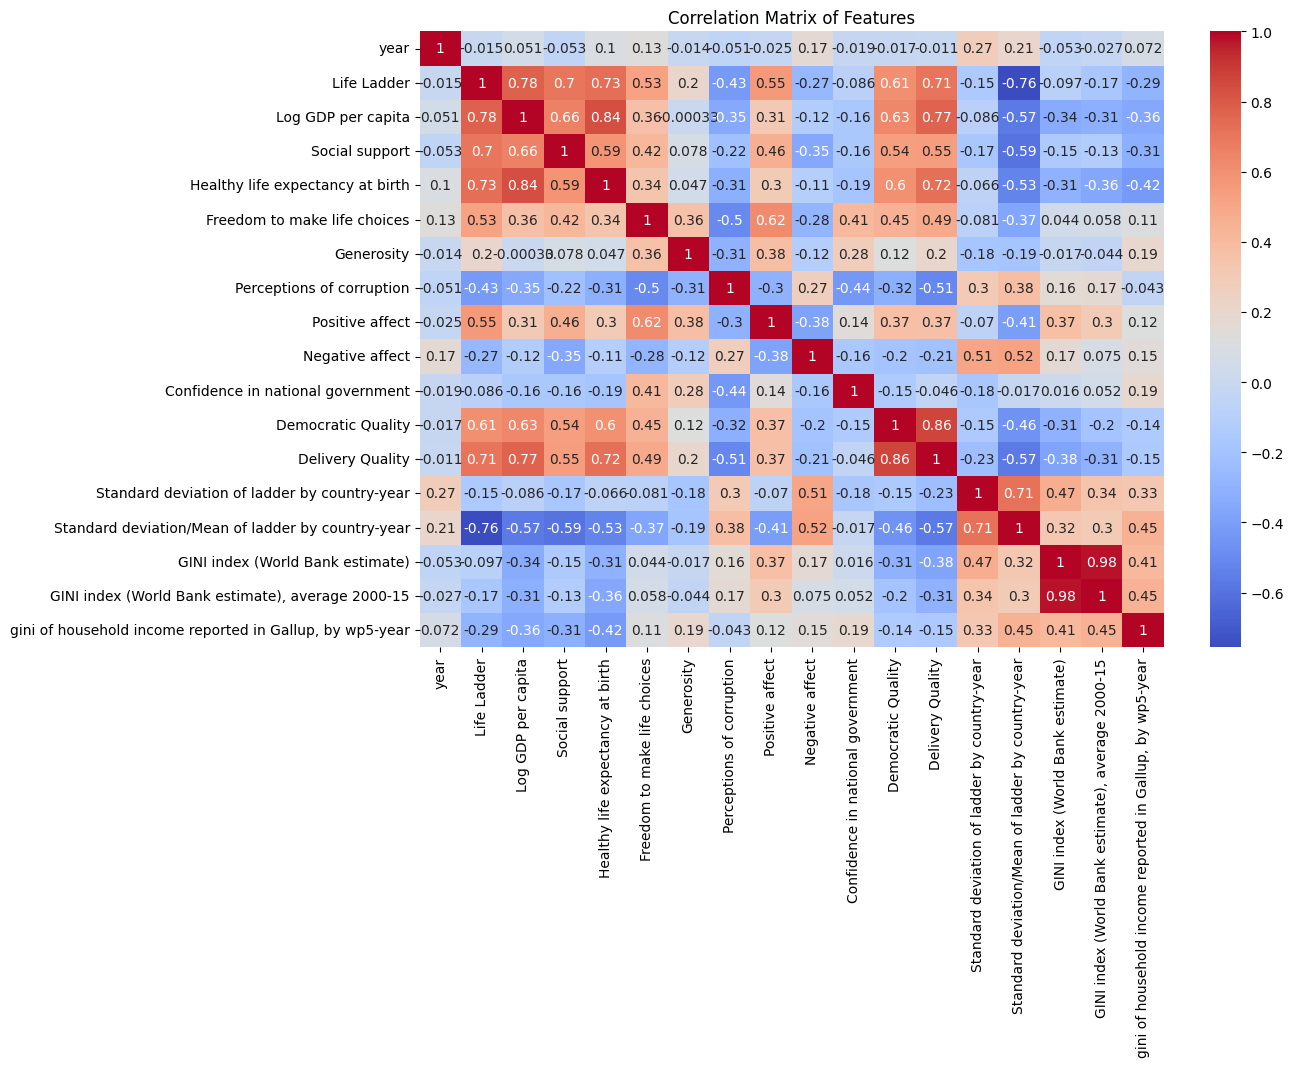

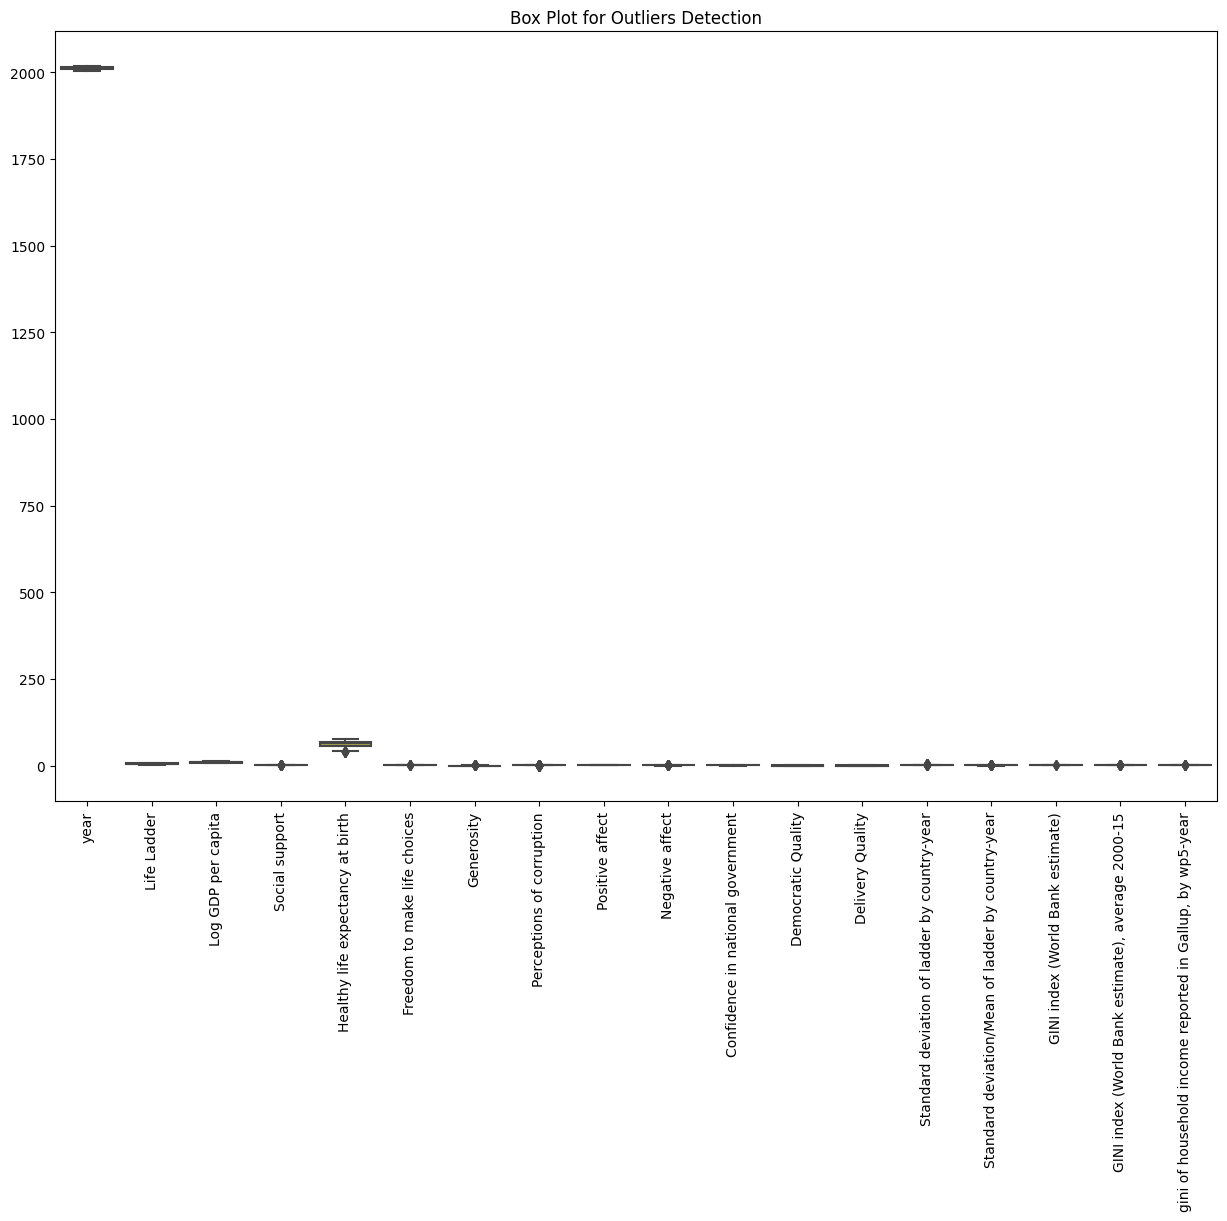

In [20]:
# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Statistical summary
print(df.describe())

# Data types
print(df.dtypes)

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Box Plot for Outliers Detection')
plt.show()


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

#### 1. Feature List
**New Feature List:**
- **Kept Features:**
  - Confidence in national government
  - Perceptions of corruption
  - Democratic Quality
  - Social support
  - Healthy life expectancy at birth
  - Freedom to make life choices
  - Generosity
  - Positive affect
  - Negative affect
  - Life Ladder
  - Social_support_x_Healthy_life_expectancy (Interaction Feature)
  - Freedom_x_Generosity (Interaction Feature)

**Removed Features:**
- None explicitly removed, but log transformation was applied to skewed features.

#### 2. Data Preparation Techniques
**Techniques Used:**
- **Handling Missing Values:** Fill missing values with the mean of the column.
- **Handling Outliers:** Apply capping (Winsorization) to limit the impact of outliers.
- **Feature Transformation:** 
  - Log transformation applied to skewed features (Confidence in national government, Perceptions of corruption, Generosity) to normalize distributions.
  - Interaction features created to capture relationships between important features.
- **Feature Scaling:** Standardize numerical features to ensure they are on the same scale.

#### 3. Model Selection
**Chosen Models:**
- **Linear Regression:** Simple, interpretable model suitable for regression tasks.
- **Random Forest Regressor:** Ensemble method that can handle non-linear relationships and interactions between features.
- **Gradient Boosting Regressor:** Powerful model that often provides high predictive performance by combining weak learners.

#### 4. Model Training, Validation, and Selection Plan

**Plan:**
1. **Data Splitting:**
   - Split the dataset into training and testing sets (80% training, 20% testing) to evaluate model performance on unseen data.

2. **Model Training:**
   - Train each selected model (Linear Regression, Random Forest Regressor, Gradient Boosting Regressor) on the training set.

3. **Model Evaluation:**
   - Evaluate model performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).
   - Perform cross-validation to ensure robustness and generalizability of the models.

4. **Feature Importance Analysis:**
   - Analyze feature importance for ensemble models (Random Forest and Gradient Boosting) to understand which features contribute most to the predictions.

5. **Model Improvement:**
   - Conduct hyperparameter tuning using GridSearchCV for Random Forest and Gradient Boosting Regressors to optimize model performance.
   - Experiment with different feature engineering techniques if needed based on the feature importance analysis.

6. **Model Selection:**
   - Compare the performance of all models and select the one with the best generalization performance on the test set.

**Implementation Steps:**
1. **Prepare the Data:**
   - Apply the defined data preparation techniques (handling missing values, outliers, transformations, and scaling).

2. **Train and Evaluate Models:**
   - Train Linear Regression, Random Forest Regressor, and Gradient Boosting Regressor on the prepared training data.
   - Evaluate each model on the test set and through cross-validation.

3. **Optimize Models:**
   - Use GridSearchCV to tune hyperparameters for Random Forest and Gradient Boosting Regressors.
   - Analyze and interpret feature importances to potentially refine features.

4. **Select the Best Model:**
   - Based on evaluation metrics and cross-validation scores, select the model that best generalizes to new data.
   - Ensure the selected model is both accurate and interpretable for predicting economic growth (Log GDP per capita).

By following this structured approach, we aim to build a robust model that accurately predicts the economic growth of countries, represented by Log GDP per capita, while ensuring the model generalizes well to new data.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

/tmp/ipykernel_1559/1436743909.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


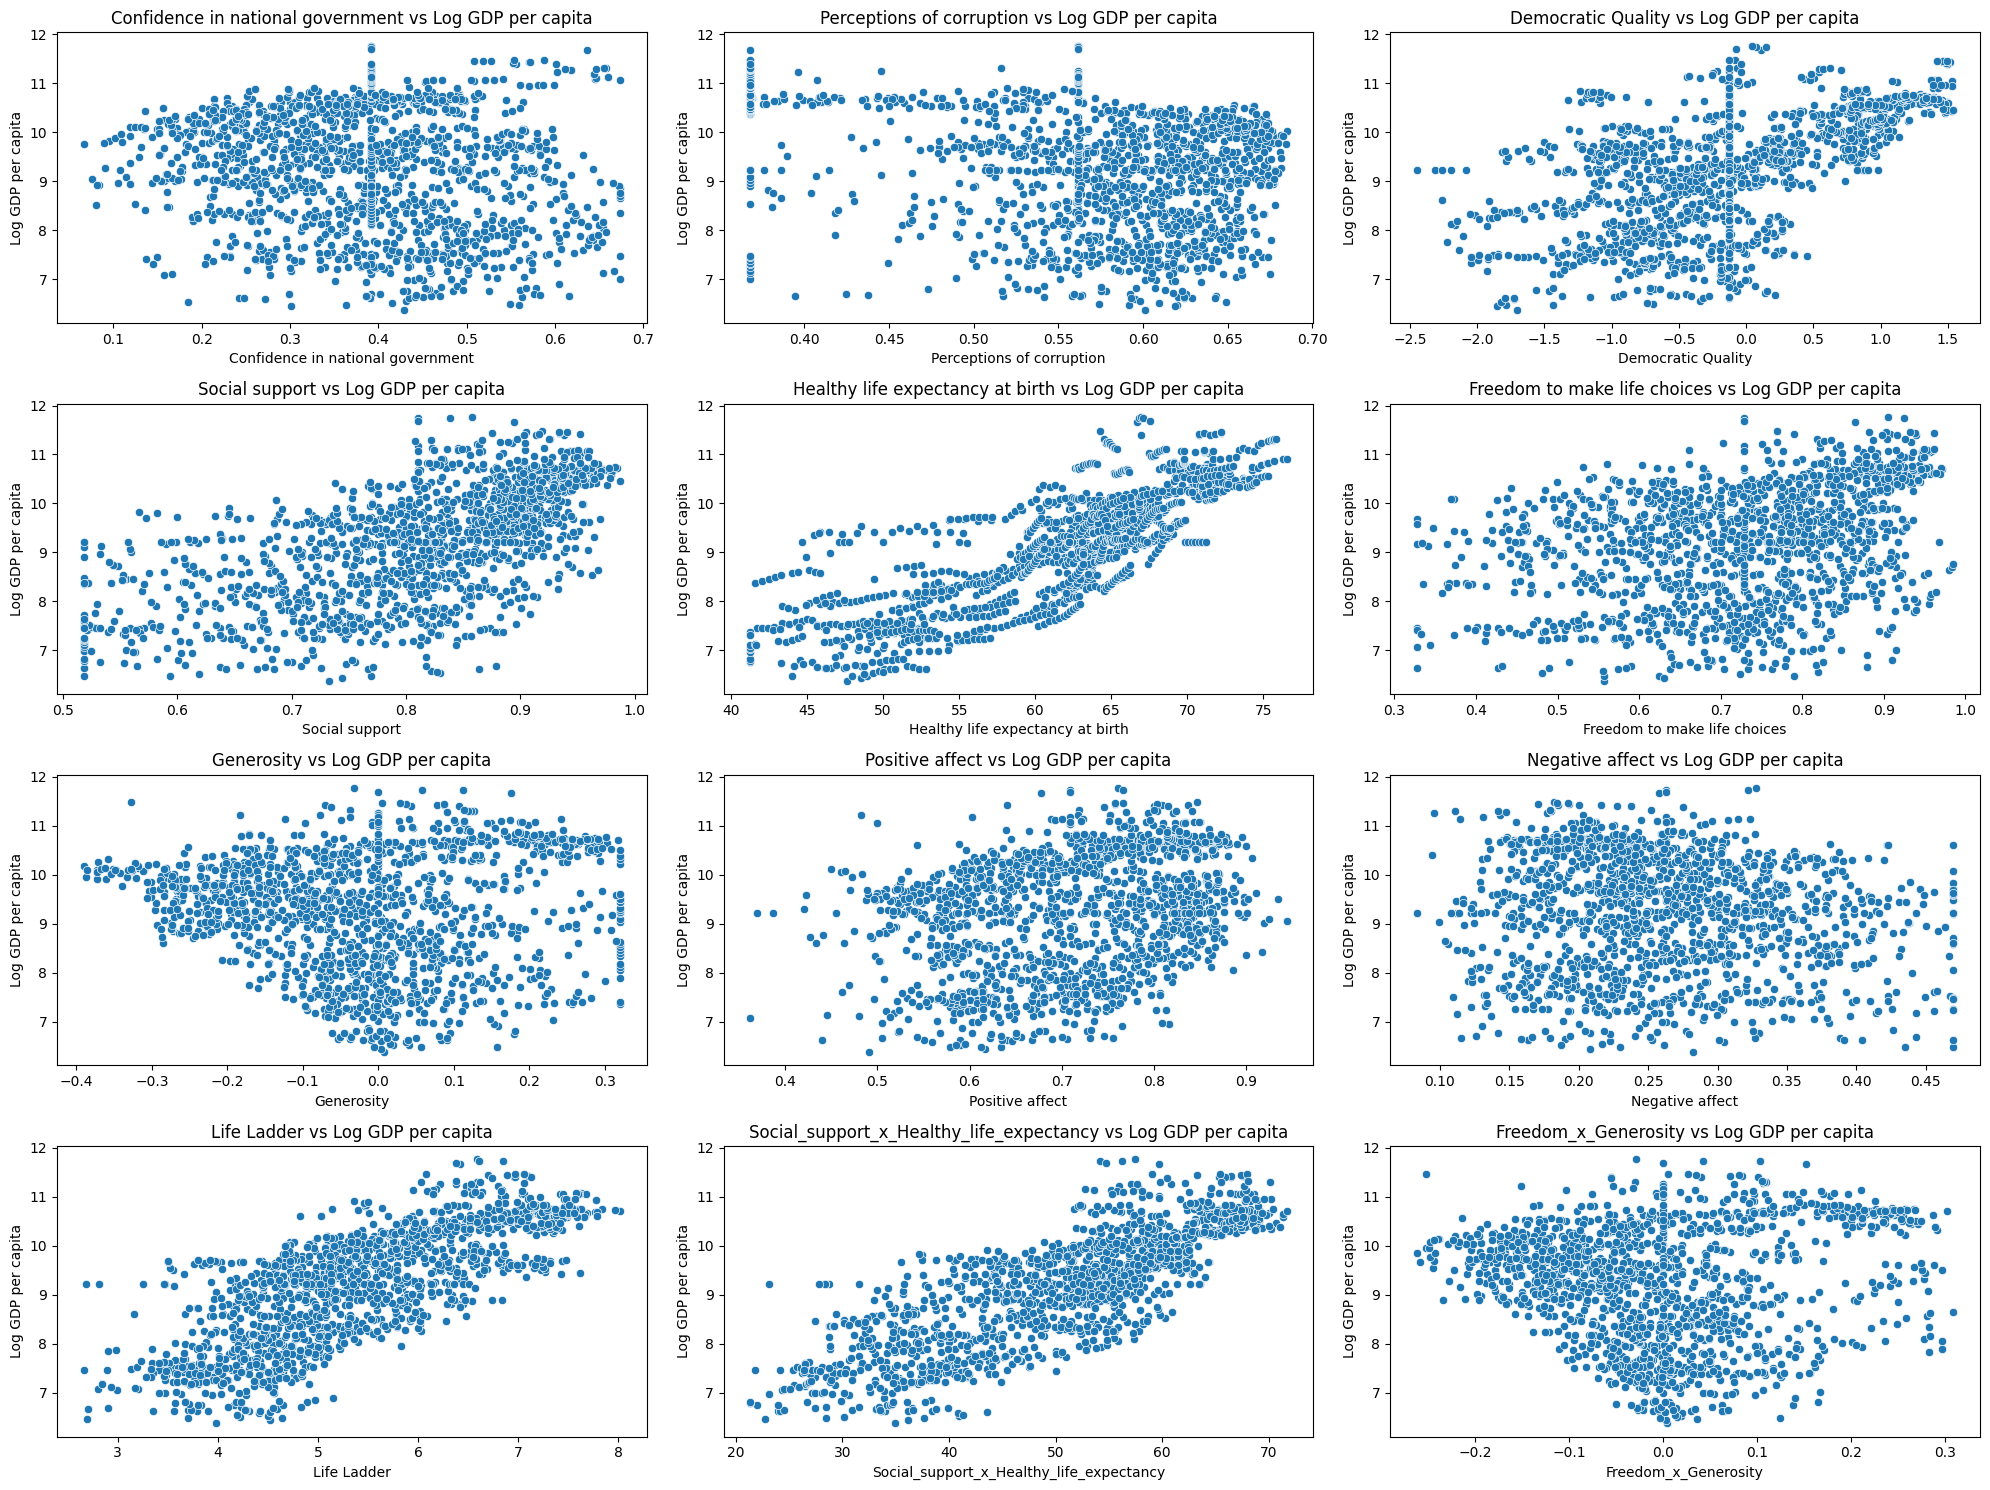

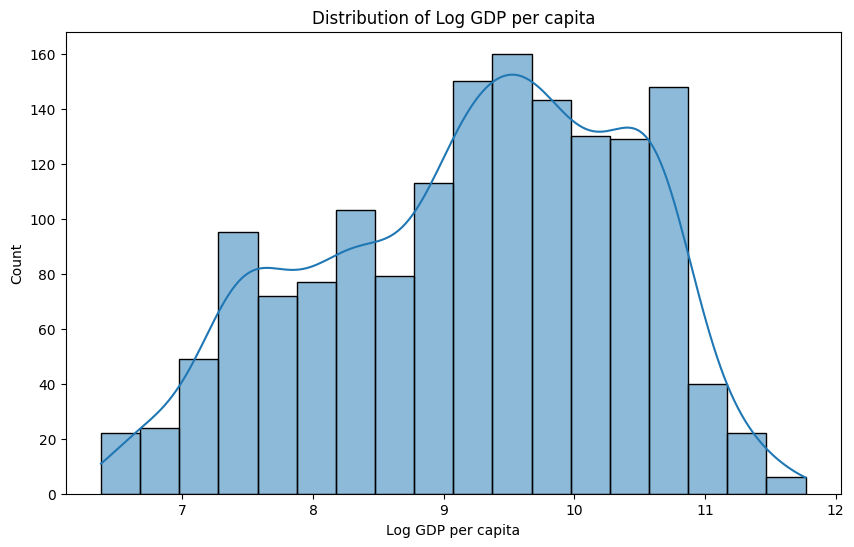

Linear Regression MAE: 0.42094170262408975
Linear Regression MSE: 0.29909972240321636
Linear Regression R²: 0.7766679433587143


In [22]:
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Handling outliers by capping (Winsorization)
for col in df.select_dtypes(include=[np.number]).columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Apply log transformation to skewed features
data = df
skewed_features = ['Confidence in national government', 'Perceptions of corruption', 'Generosity']
for feature in skewed_features:
    data[feature] = np.log1p(data[feature])

# Creating interaction features manually
data['Social_support_x_Healthy_life_expectancy'] = data['Social support'] * data['Healthy life expectancy at birth']
data['Freedom_x_Generosity'] = data['Freedom to make life choices'] * data['Generosity']

# Selecting features and target
features = ['Confidence in national government', 'Perceptions of corruption', 'Democratic Quality',
            'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices',
            'Generosity', 'Positive affect', 'Negative affect', 'Life Ladder',
            'Social_support_x_Healthy_life_expectancy', 'Freedom_x_Generosity']
target = 'Log GDP per capita'

# Scaling features
scaler = StandardScaler()
X = scaler.fit_transform(data[features])
y = data[target]

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x=data[feature], y=data[target])
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data[target], kde=True)
plt.title('Distribution of Log GDP per capita')
plt.show()


# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
print(f'Linear Regression MAE: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'Linear Regression MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'Linear Regression R²: {r2_score(y_test, y_pred_lr)}')


In [23]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print(f'Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Random Forest MSE: {mean_squared_error(y_test, y_pred_rf)}')
print(f'Random Forest R²: {r2_score(y_test, y_pred_rf)}')

Random Forest MAE: 0.23605124810893485
Random Forest MSE: 0.12461135365728544
Random Forest R²: 0.9069550794981384


In [24]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Evaluation
print(f'Gradient Boosting MAE: {mean_absolute_error(y_test, y_pred_gbr)}')
print(f'Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gbr)}')
print(f'Gradient Boosting R²: {r2_score(y_test, y_pred_gbr)}')

Gradient Boosting MAE: 0.28173889975877897
Gradient Boosting MSE: 0.1544337488831593
Gradient Boosting R²: 0.8846872659199467


In [25]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation
print(f'Tuned Random Forest MAE: {mean_absolute_error(y_test, y_pred_best_rf)}')
print(f'Tuned Random Forest MSE: {mean_squared_error(y_test, y_pred_best_rf)}')
print(f'Tuned Random Forest R²: {r2_score(y_test, y_pred_best_rf)}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest MAE: 0.23592146865258237
Tuned Random Forest MSE: 0.12251599760768857
Tuned Random Forest R²: 0.9085196418862016


In [26]:
# Cross-Validation for Random Forest Regressor
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='r2')
print(f'Cross-validated R²: {np.mean(cv_scores)}')

Cross-validated R²: 0.7752723536479904


Feature ranking (to predict Log GDP per capita):
1. Healthy life expectancy at birth: 0.5744
2. Social_support_x_Healthy_life_expectancy: 0.1828
3. Life Ladder: 0.0537
4. Freedom_x_Generosity: 0.0314
5. Positive affect: 0.0263
6. Democratic Quality: 0.0260
7. Generosity: 0.0257
8. Perceptions of corruption: 0.0241
9. Confidence in national government: 0.0198
10. Negative affect: 0.0171
11. Freedom to make life choices: 0.0104
12. Social support: 0.0082


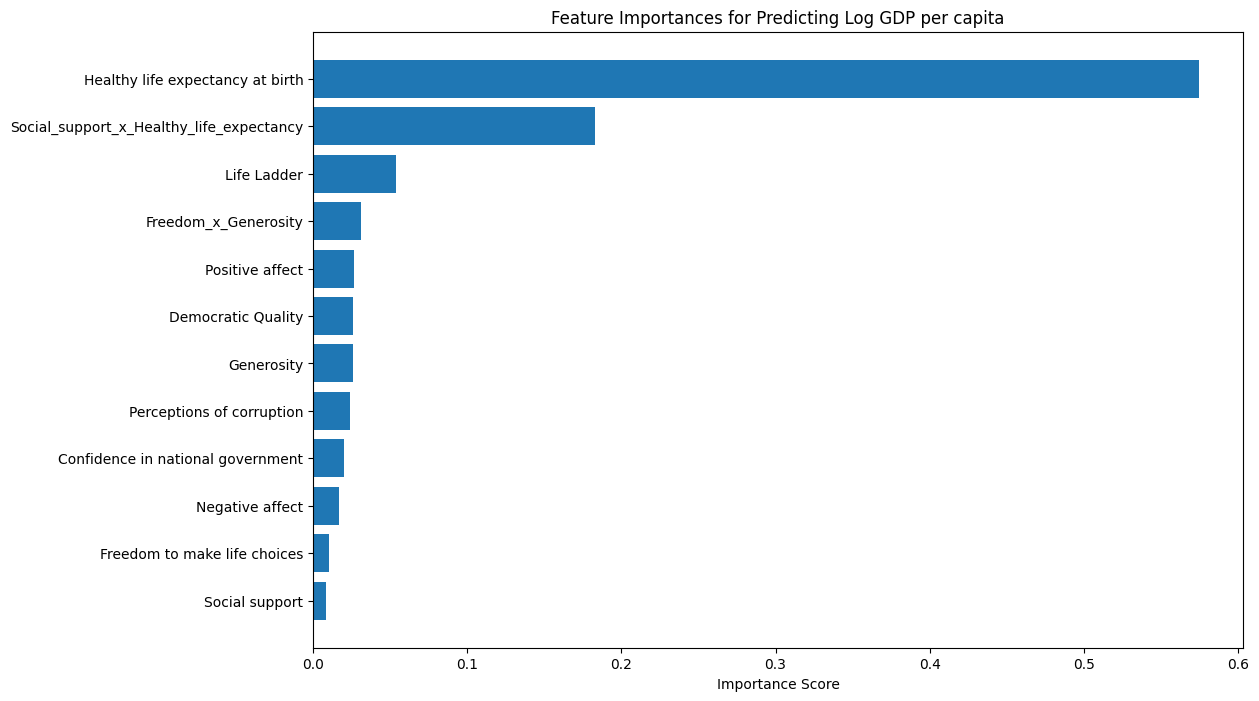

In [27]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking with names and importance scores
print("Feature ranking (to predict Log GDP per capita):")
for i in range(len(features)):
    print(f"{i + 1}. {features[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Predicting Log GDP per capita")
plt.barh(range(len(features)), importances[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.xlabel("Importance Score")
plt.show()